In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 241116


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test/rice_random_gene_idmapping_all.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/xup4lvh0/stg9236d3ae-00b2-4533-9014-0a2bb8d66a74/foldseek_zm_random_9606.tsv"
query_uniprot_idmapping_tsv = "/tmp/xup4lvh0/stgdd550faf-4495-4507-8482-9acecaa81ab1/zea_mays_random_gene_idmapping_all.tsv"
water_result_dir_path = "/tmp/xup4lvh0/stg361f9941-1162-4125-aea3-393d52459b59/result_water"
needle_result_dir_path = "/tmp/xup4lvh0/stgf85f117c-4f86-4a0d-8e5b-8f24729661d9/result_needle"
query_gene_list_tsv_path = "/tmp/xup4lvh0/stgf311ab72-88ac-43b9-b7cf-7016d98efaaa/zea_mays_random_gene_list.tsv"
togoid_convert_tsv_path = "/tmp/xup4lvh0/stg8c91bc77-4704-47b1-b59d-507c6a937d79/foldseek_hit_species_togoid_convert.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Zm00001eb376070""","""A0A804R211""","""Q9HCN8""",0.0000273,1.0,15,12.0,0.12,25,2,180,198,33,221,221,208,0.904,0.855,0.5773,0.5508,0.4998,0.4998,10.37,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GCLLPDQAFVRLRNRTYGMYLYAHE---DG…","""AELVTCGSVLKLLNTHHRVRLHSHDIKYGS…",135,"""0.213,0.198,0.564,0.674,0.643,…"
"""Zm00001eb376070""","""A0A804R211""","""Q16658""",0.0006583,1.0,9,15.9,0.159,25,5,160,198,8,136,493,157,0.788,0.262,0.5642,0.5399,0.2323,0.2323,3.474,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LPDQAFVRLRNRTYGMYLYAHEDGAAVVLK…","""EAVQIQFGLINCG-NKYLTAEAFGFKVNAS…",103,"""0.060,0.121,0.270,0.410,0.649,…"
"""Zm00001eb376070""","""A0A804R211""","""P61328""",0.0003742,1.0,11,13.3,0.133,28,5,198,198,65,243,243,209,0.98,0.737,0.6212,0.5314,0.4419,0.4419,20.29,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LPDQ----AFVRLRNRTYGMYLYAHEDGAA…","""RPEPQLKGIVTRLFS-QQGYFLQMHPDG-T…",136,"""0.060,0.086,0.074,0.096,0.625,…"
"""Zm00001eb376070""","""A0A804R211""","""Q14331""",0.0004838,1.0,13,12.1,0.121,20,1,158,198,50,180,258,164,0.798,0.508,0.5482,0.5197,0.408,0.408,3.59,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGCLLPDQAFVRLRNRTYGMYLYAHEDGAA…","""VTNFGEISGTIAIEMDK-GTYIHALDNG-L…",105,"""0.324,0.256,0.339,0.436,0.380,…"
"""Zm00001eb376070""","""A0A804R211""","""Q92915""",0.0003208,1.0,9,14.0,0.14,29,9,195,198,71,246,247,206,0.944,0.713,0.5821,0.4912,0.4011,0.4011,14.99,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AFVRLRNRTYGMYLYAHEDGAAVVLKPHRA…","""IVTRLYCRQ-GYYLQMHPDG-ALDGTKDDS…",128,"""0.613,0.730,0.746,0.736,0.705,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb287130""","""B4FI43""","""Q99808""",0.01162,1.0,26,12.2,0.122,59,14,391,440,11,449,456,483,0.859,0.963,0.3831,0.4963,0.482,0.482,8.594,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AARRRLV---IGVGFWVQ-GFRLFP--WLG…","""YKAVWLIFFMLGLGTLLPWNFFMTATQYFT…",275,"""0.133,0.256,0.277,0.193,0.212,…"
"""Zm00001eb287130""","""B4FI43""","""Q9NQ40""",0.007425,1.0,26,14.3,0.143,75,14,429,440,2,446,469,522,0.945,0.949,0.3544,0.4049,0.3843,0.3843,16.62,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AARRRL---VIGVGFWV--QGFRL-FPWLG…","""AFLMHLLVCVFGMGSWVTINGLWVELPLLV…",264,"""0.293,0.312,0.272,0.287,0.322,…"
"""Zm00001eb287130""","""B4FI43""","""Q9BZD2""",0.01483,0.999,27,11.6,0.116,55,13,399,440,54,472,475,473,0.88,0.882,0.3469,0.4281,0.4035,0.4035,10.39,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TAARRRLVIGV----GFWVQGFRLFPWLGV…","""YIIFFSLGIGSLLPWNFFITAKEYWMFKLR…",278,"""0.449,0.314,0.438,0.353,0.287,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

<Figure size 4000x4000 with 0 Axes>

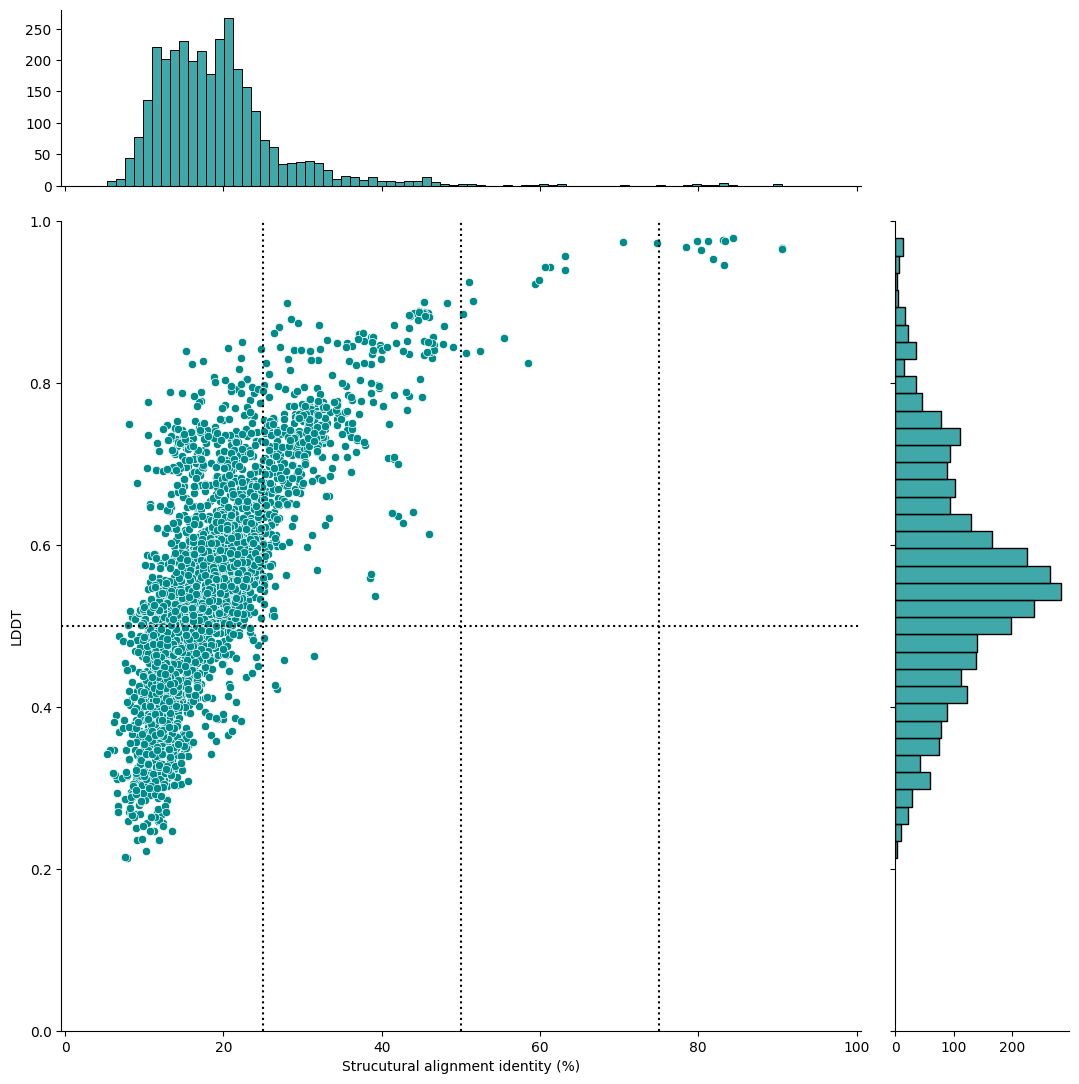

<Figure size 5000x5000 with 0 Axes>

In [6]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_result,
    x="pident", # Strucutural alignment identity (%) 
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)


plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Strucutural alignment identity (%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame())

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame())

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A1D6E0F4""","""A4D1Z8""",149,"""36/149""",24.2,"""46/149""",30.9,"""50/149""",33.6,37.0
"""A0A1D6E0F4""","""A8MQ27""",167,"""29/167""",17.4,"""46/167""",27.5,"""54/167""",32.3,50.5
"""A0A1D6E0F4""","""A8MUM7""",116,"""26/116""",22.4,"""50/116""",43.1,"""24/116""",20.7,46.0
"""A0A1D6E0F4""","""O00182""",30,"""10/30""",33.3,"""13/30""",43.3,"""5/30""",16.7,37.0
"""A0A1D6E0F4""","""O00214""",87,"""20/87""",23.0,"""30/87""",34.5,"""17/87""",19.5,42.0
…,…,…,…,…,…,…,…,…,…
"""Q41834""","""Q9UBU9""",81,"""24/81""",29.6,"""33/81""",40.7,"""22/81""",27.2,53.5
"""Q41834""","""Q9UN86""",306,"""68/306""",22.2,"""115/306""",37.6,"""88/306""",28.8,143.0
"""Q41834""","""Q9UNP9""",85,"""35/85""",41.2,"""48/85""",56.5,"""10/85""",11.8,129.0


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A1D6E0F4""","""A4D1Z8""",337,"""36/337""",10.7,"""51/337""",15.1,"""233/337""",69.1,23.5
"""A0A1D6E0F4""","""A8MQ27""",649,"""55/649""",8.5,"""84/649""",12.9,"""446/649""",68.7,25.5
"""A0A1D6E0F4""","""A8MUM7""",303,"""34/303""",11.2,"""62/303""",20.5,"""167/303""",55.1,35.5
"""A0A1D6E0F4""","""O00182""",550,"""32/550""",5.8,"""49/550""",8.9,"""448/550""",81.5,16.5
"""A0A1D6E0F4""","""O00214""",393,"""51/393""",13.0,"""92/393""",23.4,"""172/393""",43.8,21.5
…,…,…,…,…,…,…,…,…,…
"""Q41834""","""Q9UBU9""",855,"""25/855""",2.9,"""36/855""",4.2,"""788/855""",92.2,47.5
"""Q41834""","""Q9UN86""",510,"""78/510""",15.3,"""133/510""",26.1,"""235/510""",46.1,130.5
"""Q41834""","""Q9UNP9""",518,"""35/518""",6.8,"""50/518""",9.7,"""432/518""",83.4,117.5


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A1D6E0F4""","""A4D1Z8""",149,337,"""36/149""","""36/337""",24.2,10.7,30.9,15.1,"""50/149""","""233/337""",33.6,69.1,37.0,23.5
"""A0A1D6E0F4""","""A8MQ27""",167,649,"""29/167""","""55/649""",17.4,8.5,27.5,12.9,"""54/167""","""446/649""",32.3,68.7,50.5,25.5
"""A0A1D6E0F4""","""A8MUM7""",116,303,"""26/116""","""34/303""",22.4,11.2,43.1,20.5,"""24/116""","""167/303""",20.7,55.1,46.0,35.5
"""A0A1D6E0F4""","""O00182""",30,550,"""10/30""","""32/550""",33.3,5.8,43.3,8.9,"""5/30""","""448/550""",16.7,81.5,37.0,16.5
"""A0A1D6E0F4""","""O00214""",87,393,"""20/87""","""51/393""",23.0,13.0,34.5,23.4,"""17/87""","""172/393""",19.5,43.8,42.0,21.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q41834""","""Q9UBU9""",81,855,"""24/81""","""25/855""",29.6,2.9,40.7,4.2,"""22/81""","""788/855""",27.2,92.2,53.5,47.5
"""Q41834""","""Q9UN86""",306,510,"""68/306""","""78/510""",22.2,15.3,37.6,26.1,"""88/306""","""235/510""",28.8,46.1,143.0,130.5
"""Q41834""","""Q9UNP9""",85,518,"""35/85""","""35/518""",41.2,6.8,56.5,9.7,"""10/85""","""432/518""",11.8,83.4,129.0,117.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (3_184, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ B4FI43      ┆ Q16572     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ B4FI43      ┆ Q8N370     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ B4FI43      ┆ Q8TDB8     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ K7VEJ7      ┆ P19623     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Zm00001eb287130""","""B4FI43""","""Q16572""",8.8410e-7,1.0,20,12.5,0.125,64,2,433,440,11,479,532,511,0.982,0.882,0.5405,0.6082,0.5233,0.5233,6.527,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EEEKQVMEGAATAA------RR---RLVIG…","""RAAATKLSEAVGAALQEPRRQRRLVLVIVC…",326,"""0.900,0.909,0.917,0.893,0.794,…",395,614,"""91/395""","""106/614""",23.0,17.3,36.5,27.5,"""105/395""","""256/614""",26.6,41.7,90.5,70.5
"""Zm00001eb287130""","""B4FI43""","""Q8N370""",0.007733,1.0,22,12.0,0.12,66,12,425,440,6,537,569,554,0.941,0.935,0.4261,0.5111,0.4202,0.4202,10.2,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ATAARRRLVIGVGFWVQGF----RLFPWLG…","""ATAHRRRWWMACTAVLENLLFSAVLLGWGS…",326,"""0.442,0.340,0.378,0.425,0.299,…",453,697,"""102/453""","""106/697""",22.5,15.2,34.4,23.4,"""150/453""","""385/697""",33.1,55.2,80.0,73.0
"""Zm00001eb287130""","""B4FI43""","""Q8TDB8""",0.000032,1.0,24,11.5,0.115,56,15,427,440,35,471,520,485,0.939,0.84,0.4079,0.5276,0.4619,0.4619,8.2,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ARRRLVIGVGFWVQGFRLF----PWLGVNF…","""IFAITVATIGSFQFGYNTGVINAPETIIKE…",309,"""0.400,0.478,0.500,0.466,0.517,…",249,766,"""53/249""","""57/766""",21.3,7.4,38.2,12.3,"""52/249""","""572/766""",20.9,74.7,70.5,60.0
"""Zm00001eb396280""","""K7VEJ7""","""P19623""",0.0004115,1.0,13,11.3,0.113,22,106,280,327,77,256,302,193,0.535,0.596,0.4597,0.3897,0.4175,0.4175,4.819,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""IDLSKLEFDLLVRYIPGLAPSRVAFVGSGP…","""FSYQEMIANLPLCSHP--NPRKVLIIGGGD…",140,"""0.386,0.424,0.496,0.527,0.543,…",95,559,"""18/95""","""17/559""",18.9,3.0,36.8,5.2,"""32/95""","""489/559""",33.7,87.5,32.5,9.0
"""Zm00001eb331340""","""A0A1D6IP15""","""Q562R1""",4.1610e-49,1.0,4,44.1,0.441,169,5,386,389,7,375,376,383,0.982,0.981,0.8857,0.9246,0.9561,0.9561,1.504,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""NVVVCDNGTGYVKCGFAGENFPTSVFPCVV…","""SALVVDNGSGMCKAGFGGDDAPRAVFPSMI…",199,"""0.468,0.833,0.908,0.932,0.956,…",383,392,"""169/383""","""169/392""",44.1,43.1,64.2,62.8,"""15/383""","""19/392""",3.9,4.8,892.5,884.5


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (sequence alignment info vs LDDT)

<Figure size 4000x4000 with 0 Axes>

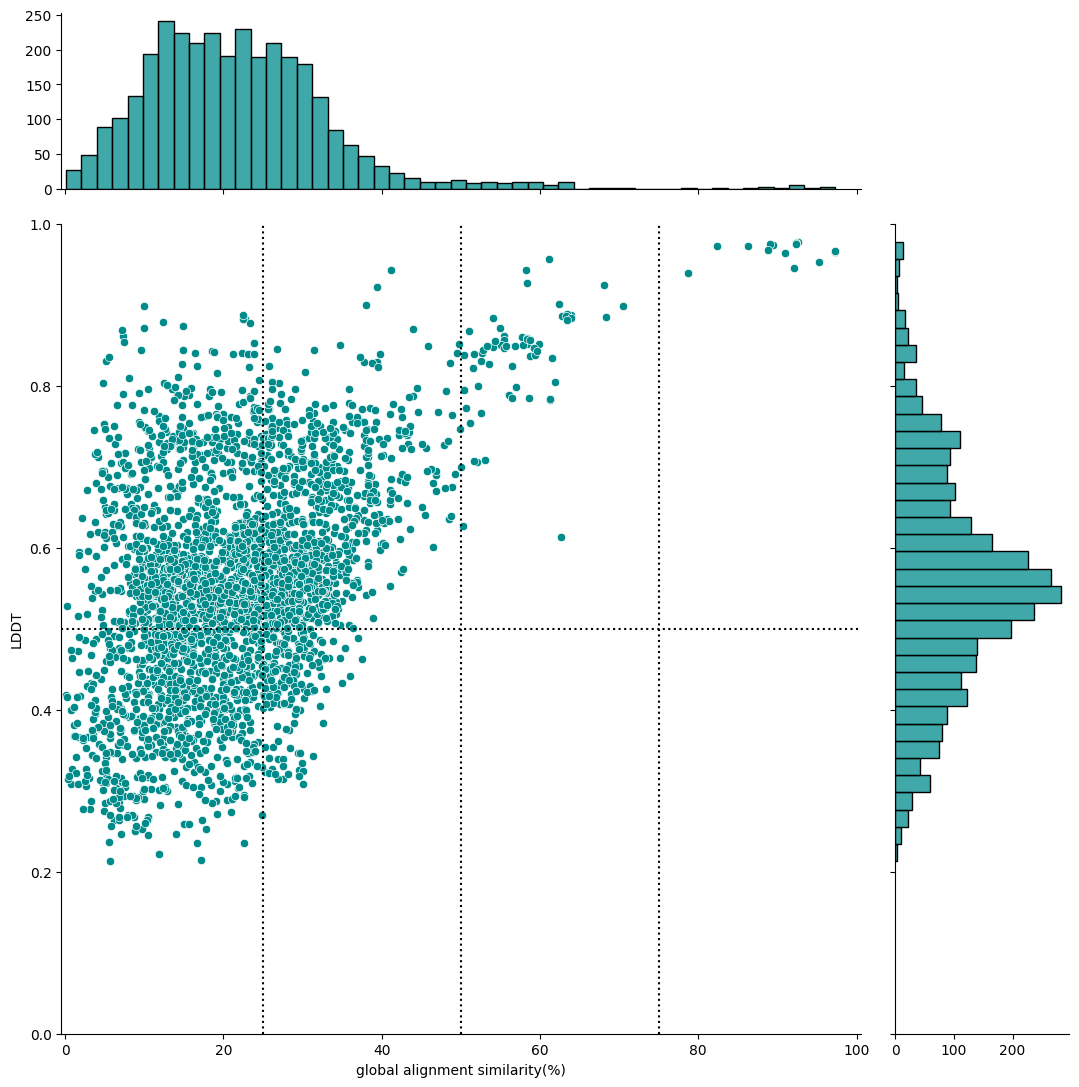

<Figure size 5000x5000 with 0 Axes>

In [11]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=join_foldseek,
    x="Similarity_percent_needle", # You can also use Identity_percent_water, Similarity_percent_needle, Similarity_percent_water
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
# plt.fill_betweenx(
#     y=[0.5, 1],
#     x1=-0.5,
#     x2=25,
#     color="red",
#     alpha=0.1
# )

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("global alignment similarity(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;


# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- Select the ones that have foldseek hit

In [12]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Zm00001eb292530""",781,false
"""Zm00001eb360640""",365,false
"""Zm00001eb184670""",182,false
"""Zm00001eb111740""",158,false
"""Zm00001eb287130""",132,false
…,…,…
"""Zm00001eb231650""",0,true
"""Zm00001eb127880""",0,true
"""Zm00001eb102620""",0,true


### Filter out the ones that have no foldseek hit

In [13]:
no_hit_genes_list = hit_count.filter(
    pl.col("foldseek no hit") == True
)

idmapping_list = pl.read_csv(
    query_uniprot_idmapping_tsv,
    separator='\t'
)
  
no_hit_idmapping_list = no_hit_genes_list.join(
    idmapping_list,
    on="From",
    how="left"
).sort(
    by=["From"],
    descending=[False]
)

print(no_hit_idmapping_list.group_by(["From"], maintain_order=True).n_unique())
display(no_hit_idmapping_list.head())

shape: (37, 4)
┌─────────────────┬─────────────────────────────────┬─────────────────┬───────────────────┐
│ From            ┆ target hit count (gene level v… ┆ foldseek no hit ┆ UniProt Accession │
│ ---             ┆ ---                             ┆ ---             ┆ ---               │
│ str             ┆ u32                             ┆ u32             ┆ u32               │
╞═════════════════╪═════════════════════════════════╪═════════════════╪═══════════════════╡
│ Zm00001eb001830 ┆ 1                               ┆ 1               ┆ 2                 │
│ Zm00001eb004880 ┆ 1                               ┆ 1               ┆ 1                 │
│ Zm00001eb017700 ┆ 1                               ┆ 1               ┆ 1                 │
│ Zm00001eb042290 ┆ 1                               ┆ 1               ┆ 1                 │
│ Zm00001eb043170 ┆ 1                               ┆ 1               ┆ 1                 │
│ …               ┆ …                               ┆ …          

From,target hit count (gene level vs uniprot accession),foldseek no hit,UniProt Accession
str,u32,bool,str
"""Zm00001eb001830""",0,true,"""A0A804LCQ3"""
"""Zm00001eb001830""",0,true,"""B6TX01"""
"""Zm00001eb004880""",0,true,"""A0A804LE50"""
"""Zm00001eb017700""",0,true,"""B4FQP5"""
"""Zm00001eb042290""",0,true,"""A0A804MRX5"""


&nbsp;

&nbsp;

## Filtering Condition2

In [14]:
condition2 = join_foldseek.sort(
    by=["qcov", "foldseek hit", "lddt"], # sort by qcov, foldseek hit, lddt
    descending=[True, False, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    [
        pl.all().first() # sustain the first record in each group (in this case, qcov is the highest and lddt is the highest)
    ]
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False],
    maintain_order=True
)

print(condition2.group_by(["From"], maintain_order=True).n_unique())
display(condition2)

shape: (63, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ foldseek   ┆ UniProt   ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ hit        ┆ Accession ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Zm00001eb0 ┆ 1          ┆ 1         ┆ 1      ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1         │
│ 15120      ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Zm00001eb0 ┆ 13         ┆ 1         ┆ 13     ┆ … ┆ 11        ┆ 13        

From,foldseek hit,UniProt Accession,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Zm00001eb015120""","""P10244""","""B4FYQ1""",2.2480e-8,1.0,8,21.2,0.212,64,20,293,336,80,357,700,301,0.815,0.397,0.6932,0.3082,0.1504,0.1504,42.49,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ELRRGPWTVEEDLQLVNYVDAHGEGRWNSL…","""DLVKGPWTKEEDQKVIELVKKYGTKQWTLI…",187,"""0.478,0.570,0.638,0.583,0.521,…",109,769,"""46/109""","""86/769""",42.2,11.2,66.1,18.3,"""3/109""","""502/769""",2.8,65.3,251.5,237.0
"""Zm00001eb016250""","""A6NG13""","""A0A1D6K2E8""",0.09363,0.233,17,7.9,0.079,22,541,753,809,98,349,374,276,0.263,0.674,0.2589,0.1084,0.1928,0.1928,13.75,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LTSLHGSIENLI--YDPEQNDEHIGHLDDR…","""VSNTFEDLKFFFPHLRKEGRIYPDVIIGKG…",167,"""0.111,0.220,0.385,0.314,0.346,…",111,903,"""20/111""","""72/903""",18.0,8.0,36.0,15.7,"""36/111""","""623/903""",32.4,69.0,52.0,34.0
"""Zm00001eb016250""","""C9J202""","""A0A1D6K2E8""",0.004906,0.999,11,13.2,0.132,30,523,729,809,13,213,215,226,0.256,0.935,0.3742,0.1726,0.5272,0.5272,7.897,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SPGADMSIYFPHTEKAKRLTSLHGSIENLI…","""DKPASFFKEAPLDLQHRLFMKL-GSTHSPF…",152,"""0.112,0.163,0.217,0.272,0.250,…",31,858,"""10/31""","""42/858""",32.3,4.9,48.4,8.7,"""8/31""","""692/858""",25.8,80.7,38.0,15.5
"""Zm00001eb016250""","""P06737""","""A0A1D6K2E8""",0.000005,1.0,54,9.1,0.091,82,202,809,809,26,845,847,901,0.752,0.968,0.3153,0.3421,0.3285,0.3285,20.29,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GRLQSVLTKAEE-HLSKLPADTPYSQFAYK…","""AELKKSFNRHLHFTLVKDRNVATTRDYYF-…",445,"""0.250,0.263,0.259,0.271,0.385,…",557,1110,"""103/557""","""141/1110""",18.5,12.7,33.2,22.8,"""169/557""","""564/1110""",30.3,50.8,87.5,74.0
"""Zm00001eb016250""","""P11216""","""A0A1D6K2E8""",0.000039,0.998,60,9.5,0.095,87,202,806,809,26,843,843,921,0.748,0.97,0.2935,0.295,0.285,0.285,19.82,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GRLQSVLTKAEE-HLSKLP-ADTPYSQFAY…","""AEVRKSFNRHLHFTLVKDRNVATPRDYFF-…",415,"""0.250,0.276,0.255,0.276,0.397,…",576,1159,"""104/576""","""148/1159""",18.1,12.8,31.4,21.5,"""231/576""","""666/1159""",40.1,57.5,85.0,68.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423230""","""Q8N635""","""A0A1D6PJP8""",9.4530e-12,1.0,19,12.1,0.121,36,10,266,279,1,288,442,297,0.921,0.652,0.5335,0.4185,0.3061,0.3061,9.928,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""NRTVPDIRPFPPFVLFDDIQDFNNLPHVKS…","""MANSFAARIFTT---LSDLQT-NMAN--LK…",212,"""0.528,0.639,0.625,0.778,0.694,…",139,488,"""31/139""","""69/488""",22.3,14.1,38.1,22.3,"""24/139""","""255/488""",17.3,52.3,39.5,31.0
"""Zm00001eb423230""","""Q8WTR8""","""A0A1D6PJP8""",0.03324,0.981,7,12.3,0.123,15,27,128,279,350,457,489,121,0.366,0.221,0.4643,0.2308,0.1371,0.1371,8.675,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""DIQDFNN---------LPHVKSIFARVVVK…","""NMSDTRVHMSLRRYCQQDH--VLRAQVLAS…",74,"""0.149,0.130,0.177,0.221,0.194,…",87,749,"""17/87""","""6/749""",19.5,0.8,29.9,0.8,"""43/87""","""730/749""",49.4,97.5,31.5,8.0
"""Zm00001eb423230""","""Q96I59""","""A0A1D6PJP8""",0.004554,1.0,7,11.9,0.119,18,1,146,279,7,141,477,151,0.523,0.283,0.516,0.2929,0.1832,0.1832,8.112,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MAGSGRINQNRTVPDIRPFPPFVLFDDIQD…","""LLRSVRFCSSAPFPKHKPSAKLSVRDALGA…",112,"

&nbsp;

&nbsp;

## Filtering Condition3

- select the ones with qcov (query coverage) >= 0.5 and tcov (target coverage) >= 0.5

In [15]:
condition3 = condition2.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).unique()

condition3_rm = condition2.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition3.group_by(["From"], maintain_order=True).n_unique())
display(condition3)

shape: (59, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ foldseek   ┆ UniProt   ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ hit        ┆ Accession ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Zm00001eb2 ┆ 59         ┆ 1         ┆ 58     ┆ … ┆ 49        ┆ 51        ┆ 59        ┆ 57        │
│ 25160      ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Zm00001eb3 ┆ 46         ┆ 1         ┆ 42     ┆ … ┆ 42        ┆ 45        

From,foldseek hit,UniProt Accession,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Zm00001eb225160""","""Q08477""","""C0PFY1""",2.8440e-19,1.0,24,19.1,0.191,103,3,511,519,25,520,520,537,0.981,0.954,0.6285,0.7479,0.7465,0.7465,6.021,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VNDVLLVVLAAALAAMWWRRCSKTGGVDGL…","""VGASWLLARILAWTYTFYDNCCRL--RCF-…",365,"""0.818,0.833,0.846,0.857,0.867,…",550,610,"""139/550""","""141/610""",25.3,23.1,39.3,36.2,"""137/550""","""181/610""",24.9,29.7,255.5,243.5
"""Zm00001eb396280""","""Q6FI81""","""K7VEJ7""",0.008919,0.941,14,13.1,0.131,27,126,302,327,10,184,312,205,0.541,0.561,0.3392,0.2607,0.2706,0.2706,13.18,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SRVAFVG--SGPLPFSSLVLAARHLPNTLF…","""QFVAVVWDKSSPV------EALKGL-----…",120,"""0.250,0.364,0.402,0.419,0.390,…",55,400,"""11/55""","""65/400""",20.0,16.2,43.6,27.5,"""6/55""","""161/400""",10.9,40.2,44.5,25.0
"""Zm00001eb225160""","""P33261""","""C0PFY1""",2.3350e-23,1.0,19,21.1,0.211,112,1,510,519,1,490,490,530,0.983,1.0,0.6659,0.7948,0.8384,0.8384,3.931,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MDVNDVLLVVLAAALAAMWWRRCSKTGGVD…","""MDPFVVLVLCLSCLLLLSIWRQSSGRG---…",358,"""0.864,1.000,1.000,1.000,0.962,…",517,572,"""123/517""","""128/572""",23.8,22.4,42.4,39.3,"""102/517""","""135/572""",19.7,23.6,345.0,333.0
"""Zm00001eb184670""","""A6NM36""","""A0A804NTC5""",1.4630e-7,1.0,15,19.6,0.196,65,1,321,329,3,256,301,330,0.976,0.844,0.563,0.5168,0.5581,0.5581,8.734,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MSLWKQPSKLAMVVVLLLLLCHAVDKVHCS…","""ARQSRASSK---------------DKGPKR…",180,"""0.950,1.000,0.786,0.781,0.614,…",252,402,"""67/252""","""68/402""",26.6,16.9,45.2,28.6,"""43/252""","""174/402""",17.1,43.3,152.5,132.0
"""Zm00001eb287130""","""Q9H015""","""B4FI43""",0.0001169,1.0,21,12.7,0.127,53,52,426,440,141,504,551,415,0.852,0.661,0.4236,0.5442,0.4476,0.4476,7.16,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SLQILQASANLPMVAKP-LIGLLSDAVPIR…","""KVPLTTSLFFVGVLLGSFVSGQLSDRFG--…",271,"""0.397,0.423,0.438,0.442,0.488,…",158,856,"""37/158""","""41/856""",23.4,4.8,36.7,7.8,"""39/158""","""721/856""",24.7,84.2,82.0,66.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb287130""","""P11166""","""B4FI43""",0.0000305,1.0,18,12.6,0.126,59,9,427,440,16,449,492,466,0.952,0.882,0.4218,0.51,0.4669,0.4669,9.196,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EGAATAARRRLVIGVGFWVQGFRLFPWLG-…","""VGGAVLGSLQFGYNTGVINAPQKVIEEFYN…",328,"""0.370,0.392,0.343,0.367,0.481,…",254,726,"""48/254""","""57/726""",18.9,7.9,37.4,15.0,"""63/254""","""520/726""",24.8,71.6,88.0,85.0
"""Zm00001eb071640""","""Q96A44""","""A0A1D6E0F4""",0.01061,0.9,21,12.0,0.12,38,1,263,297,9,271,273,316,0.886,0.963,0.361,0.2953,0.3151,0.3151,26.97,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MAALLCSPNKLRRS-VLLVGVALMLGMHLS…","""LKSVEVREPALRPAKRELRGAEPGRPARLD…",172,"""0.750,0.800,0.708,0.857,0.812,…",149,430,"""31/149""","""40/430""",20.8,9.3,34.2,15.6,"""45/149""","""290/430""",30.2,67.4,56.5,40.5
"""Zm00001eb110720""","""Q9BZL4""","""A0A804MTP5""",0.01473,0.214,29,11.2,0.112,91,2,683,704,20,710,782,812,0.969,0.884,0.5887,0.06786,0.06322,0.06322,49.43,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EYFAMTQQMW---REKRPTKSLVVGRPILL…","""ERRREQLRQWGARAGAEPGPGERRAR----…",470,"""0.850,0.

&nbsp;

&nbsp;


## Filtering Condition4

- select the ones that can be converted to HGNC Gene symbol through Ensembl ID by TogoID
- Article: [TogoID: an exploratory ID converter to bridge biological dataset](https://doi.org/10.1093/bioinformatics/btac491)

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null()
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A1B0GWK0""","""ENSP00000490956""","""ENST00000637878""","""ENSG00000225180""",40053,"""PVALEF"""
"""A0AVF1""","""ENSP00000339135""","""ENST00000343187""","""ENSG00000105948""",21882,"""IFT56"""
"""A0AVF1""","""ENSP00000410655""","""ENST00000430935""","""ENSG00000105948""",21882,"""IFT56"""
"""A0AVF1""","""ENSP00000419279""","""ENST00000464848""","""ENSG00000105948""",21882,"""IFT56"""
"""A0PJX0""","""ENSP00000288861""","""ENST00000288861""","""ENSG00000157884""",33703,"""CIB4"""
…,…,…,…,…,…
"""Q9Y6R4""","""ENSP00000355886""","""ENST00000366919""","""ENSG00000085511""",6856,"""MAP3K4"""
"""Q9Y6R4""","""ENSP00000375986""","""ENST00000392142""","""ENSG00000085511""",6856,"""MAP3K4"""
"""Q9Y6T7""","""ENSP00000382260""","""ENST00000399322""","""ENSG00000136267""",2850,"""DGKB"""


In [17]:
condition4 = condition3.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).filter(
    pl.col("ensembl_gene_id").is_not_null()
).group_by(
    pl.exclude(
        [
            "hgnc_id", "hgnc_symbol_id", "ensembl_gene_id", "ensembl_protein_id", "ensembl_transcript_id"
        ]
    ),
    maintain_order=True
).agg(
    pl.col("hgnc_id"),
    pl.col("hgnc_symbol_id"),
    pl.col("ensembl_gene_id"),
    pl.col("ensembl_protein_id"),
    pl.col("ensembl_transcript_id"),
).drop(
    [
        "hgnc_id",
        "ensembl_transcript_id"
    ]
).sort(
    by=["From"],
    descending=[False]
)

display(condition4)

From,foldseek hit,UniProt Accession,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle,hgnc_symbol_id,ensembl_gene_id,ensembl_protein_id
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,list[str],list[str],list[str]
"""Zm00001eb016250""","""Q9H553""","""A0A1D6K2E8""",2.2910e-17,1.0,30,17.6,0.176,92,276,777,809,14,414,416,522,0.621,0.964,0.4487,0.3763,0.6807,0.6807,6.926,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""IFNVVVVSPHGYFGQANVLGLPDTGGQIVY…","""KPSVLFLHPD--LGV---------GGAERL…",289,"""0.140,0.257,0.344,0.428,0.457,…",343,868,"""77/343""","""101/868""",22.4,11.6,42.0,22.0,"""79/343""","""511/868""",23.0,58.9,180.5,162.0,"[""ALG2"", ""ALG2""]","[""ENSG00000119523"", ""ENSG00000119523""]","[""ENSP00000326609"", ""ENSP00000417764""]"
"""Zm00001eb016250""","""P54840""","""A0A1D6K2E8""",1.2080e-8,1.0,43,13.2,0.132,95,279,809,809,30,650,703,717,0.656,0.883,0.3476,0.3461,0.3912,0.3912,17.25,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VVVVSPHGYFGQANVLGLPDTGGQIVYILD…","""LFEVA---WEVTNKVGG--------IYTVI…",340,"""0.477,0.505,0.548,0.528,0.447,…",625,1021,"""123/625""","""142/1021""",19.7,13.9,33.4,23.6,"""211/625""","""530/1021""",33.8,51.9,125.0,108.5,"[""GYS2""]","[""ENSG00000111713""]","[""ENSP00000261195""]"
"""Zm00001eb016250""","""P11216""","""A0A1D6K2E8""",0.000039,0.998,60,9.5,0.095,87,202,806,809,26,843,843,921,0.748,0.97,0.2935,0.295,0.285,0.285,19.82,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GRLQSVLTKAEE-HLSKLP-ADTPYSQFAY…","""AEVRKSFNRHLHFTLVKDRNVATPRDYFF-…",415,"""0.250,0.276,0.255,0.276,0.397,…",576,1159,"""104/576""","""148/1159""",18.1,12.8,31.4,21.5,"""231/576""","""666/1159""",40.1,57.5,85.0,68.5,"[""PYGB""]","[""ENSG00000100994""]","[""ENSP00000216962""]"
"""Zm00001eb016250""","""Q2TAA5""","""A0A1D6K2E8""",3.3650e-12,1.0,32,12.9,0.129,71,276,774,809,62,491,492,549,0.617,0.874,0.4284,0.3545,0.5438,0.5438,8.1,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""IFNVVVVSPHGYFGQANVLGLPDTGGQIVY…","""QMVIAFFHPYCNAG----------GGGERV…",309,"""0.179,0.353,0.532,0.612,0.592,…",401,918,"""87/401""","""111/918""",21.7,12.1,35.9,20.4,"""115/401""","""535/918""",28.7,58.3,101.5,67.5,"[""ALG11""]","[""ENSG00000253710""]","[""ENSP00000430236""]"
"""Zm00001eb016250""","""P37287""","""A0A1D6K2E8""",9.1030e-14,1.0,31,13.4,0.134,75,276,806,809,32,456,484,556,0.656,0.878,0.4651,0.394,0.6276,0.6276,8.116,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""IFNVVVVSPHGYFGQANVLGLPDTGGQIVY…","""THNICMVSDFFY---------PNMGGVESH…",325,"""0.208,0.327,0.468,0.555,0.647,…",397,946,"""86/397""","""107/946""",21.7,11.3,34.8,18.4,"""124/397""","""599/946""",31.2,63.3,104.5,84.0,"[""PIGA"", ""PIGA"", … ""PIGA""]","[""ENSG00000165195"", ""ENSG00000165195"", … ""ENSG00000165195""]","[""ENSP00000369820"", ""ENSP00000489528"", … ""ENSP00000489540""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423230""","""P41218""","""A0A1D6PJP8""",2.7690e-9,1.0,16,9.3,0.093,24,1,236,279,177,393,407,258,0.846,0.533,0.5159,0.3406,0.2551,0.2551,12.2,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MAGSGRINQNRTVPDIRPFPPFVLFDDIQD…","""QTSSSTPSNTSFTPNQE-----TQAQRQVD…",171,"""0.938,0.900,0.958,0.929,0.875,…",135,575,"""33/135""","""34/575""",24.4,5.9,39.3,9.9,"""41/135""","""464/575""",30.4,80.7,48.0,34.0,"[""MNDA""]","[""ENSG00000163563""]","[""ENSP00000357123""]"
"""Zm00001eb423230""","""O14862""","""A0A1D6PJP8""",9.1260e-9,1.0,15,1

In [18]:
hit_count_condition4 = condition4.group_by(
    ["From"],
    maintain_order=True
).agg(
    (pl.col("foldseek hit").count().alias("hit count (gene level)"))
).sort(
    by=["hit count (gene level)"],
    descending=True
)

display(hit_count_condition4)

From,hit count (gene level)
str,u32
"""Zm00001eb292530""",163
"""Zm00001eb287130""",128
"""Zm00001eb360640""",88
"""Zm00001eb111740""",80
"""Zm00001eb184670""",59
…,…
"""Zm00001eb161900""",1
"""Zm00001eb174130""",1
"""Zm00001eb271870""",1


In [19]:
foldseek_filter_viz = condition4.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (1_183, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Zm00001eb0 ┆ A0A1D6K2E8 ┆ Q9BT22     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 16250      ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Zm00001eb0 ┆ A0A1D6K2E8 ┆ P37287     ┆ 1    ┆ … ┆ 1          ┆ 1      

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Zm00001eb016250""","""A0A1D6K2E8""","""Q9BT22""",0.627,0.963,11.06,0.3921,5.3,21.1,9.8,34.2
"""Zm00001eb016250""","""A0A1D6K2E8""","""P37287""",0.656,0.878,8.116,0.4651,11.3,21.7,18.4,34.8
"""Zm00001eb016250""","""A0A1D6K2E8""","""P11217""",0.739,0.961,19.41,0.2953,12.2,17.5,22.6,32.2
"""Zm00001eb016250""","""A0A1D6K2E8""","""P54840""",0.656,0.883,17.25,0.3476,13.9,19.7,23.6,33.4
"""Zm00001eb016250""","""A0A1D6K2E8""","""Q2TAA5""",0.617,0.874,8.1,0.4284,12.1,21.7,20.4,35.9
…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423230""","""A0A1D6PJP8""","""P41218""",0.846,0.533,12.2,0.5159,5.9,24.4,9.9,39.3
"""Zm00001eb423230""","""A0A1D6PJP8""","""Q8N635""",0.921,0.652,9.928,0.5335,14.1,22.3,22.3,38.1
"""Zm00001eb423230""","""A0A1D6PJP8""","""O14862""",0.864,0.671,13.82,0.5251,6.0,39.5,8.6,50.0


<Figure size 4000x4000 with 0 Axes>

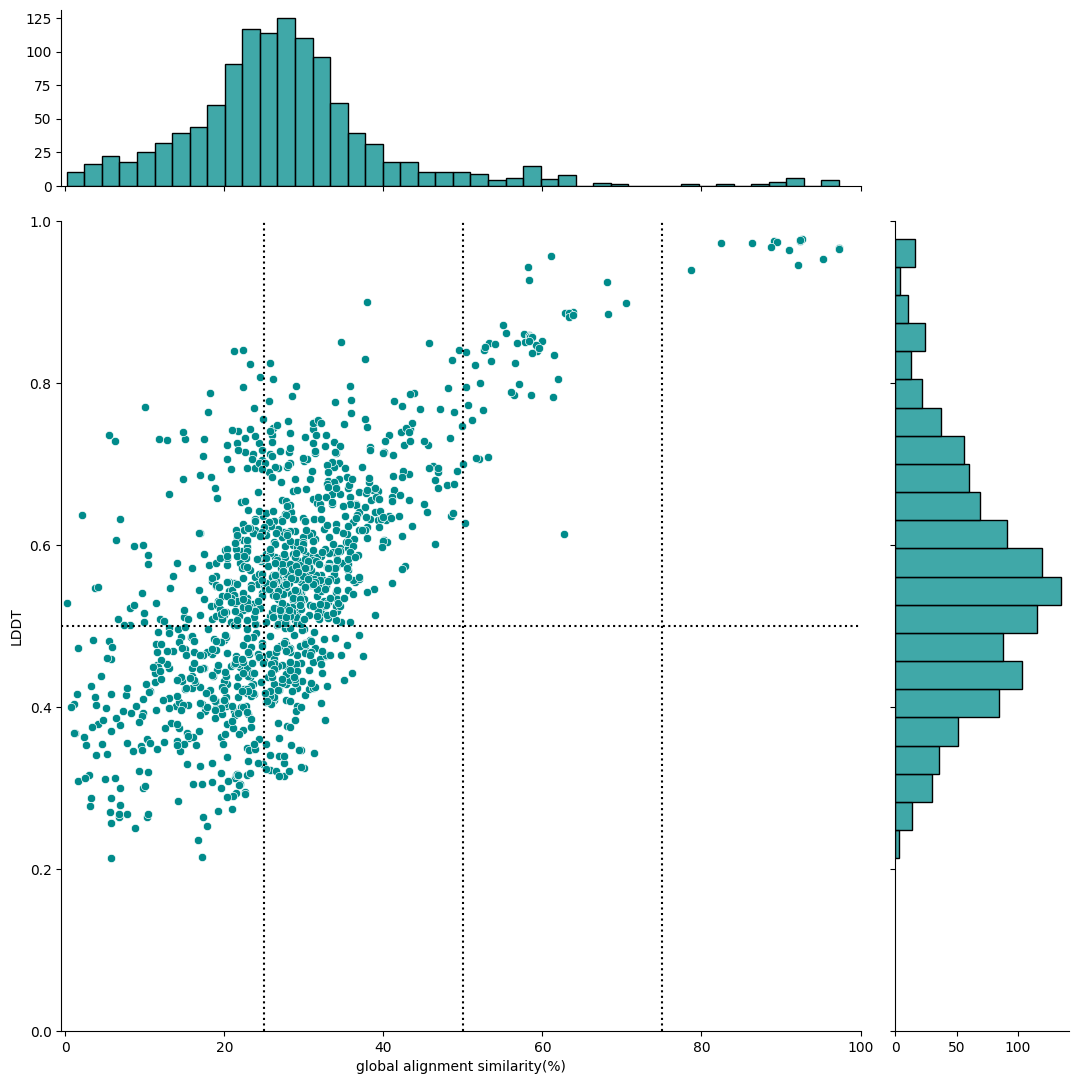

<Figure size 5000x5000 with 0 Axes>

In [20]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz,
    x="Similarity_percent_needle",
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
# plt.fill_betweenx(
#     y=[0.5, 1],
#     x1=-0.5,
#     x2=25,
#     color="red",
#     alpha=0.1
# )

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("global alignment similarity(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;
